# 비트코인 가격 분석
## 1. 작업 준비
### 1) 패키지 가져오기
- `pyupbit` 패키지 설치 필요

In [35]:
import sys
sys.path.append("../../")
from helper import set_datetime_index, exp_time_data

import pyupbit
import datetime as dt
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import seaborn as sb

## 2. pyupbit 패키지 사용
### 1) 조회 가능한 단위 목록
- `pyupbit.get_tickers()` 사용
- 코드명
    - 'KRW': 한국화폐
    - 'BTC': Bitcoin
    - 'ETH': 이더리움

In [36]:
pyupbit.get_tickers()

['KRW-BTC',
 'KRW-ETH',
 'BTC-ETH',
 'BTC-XRP',
 'BTC-ETC',
 'BTC-CVC',
 'BTC-DGB',
 'BTC-SC',
 'BTC-SNT',
 'BTC-WAVES',
 'BTC-NMR',
 'BTC-XEM',
 'BTC-QTUM',
 'BTC-BAT',
 'BTC-LSK',
 'BTC-STEEM',
 'BTC-DOGE',
 'BTC-BNT',
 'BTC-XLM',
 'BTC-ARDR',
 'BTC-ARK',
 'BTC-STORJ',
 'BTC-GRS',
 'BTC-RLC',
 'USDT-BTC',
 'USDT-ETH',
 'USDT-XRP',
 'USDT-ETC',
 'KRW-NEO',
 'KRW-MTL',
 'KRW-XRP',
 'KRW-ETC',
 'KRW-SNT',
 'KRW-WAVES',
 'KRW-XEM',
 'KRW-QTUM',
 'KRW-LSK',
 'KRW-STEEM',
 'KRW-XLM',
 'KRW-ARDR',
 'KRW-ARK',
 'KRW-STORJ',
 'KRW-GRS',
 'KRW-ADA',
 'BTC-ADA',
 'BTC-MANA',
 'KRW-SBD',
 'BTC-SBD',
 'KRW-POWR',
 'BTC-POWR',
 'KRW-BTG',
 'USDT-ADA',
 'BTC-DNT',
 'BTC-ZRX',
 'BTC-TRX',
 'BTC-TUSD',
 'BTC-LRC',
 'KRW-ICX',
 'KRW-EOS',
 'USDT-TUSD',
 'KRW-TRX',
 'BTC-POLYX',
 'USDT-SC',
 'USDT-TRX',
 'KRW-SC',
 'KRW-ONT',
 'KRW-ZIL',
 'KRW-POLYX',
 'KRW-ZRX',
 'KRW-LOOM',
 'BTC-BCH',
 'USDT-BCH',
 'KRW-BCH',
 'BTC-HIFI',
 'BTC-LOOM',
 'KRW-BAT',
 'KRW-IOST',
 'BTC-RFR',
 'KRW-RFR',
 'USDT-DGB',
 'K

### 2) 특정 단어를 포함하는 조회 가능 목록만 가져오기
- 파라미터 `fiat = ''`

In [37]:
# 한국화폐 데이터만 가져오기
pyupbit.get_tickers(fiat='KRW')

['KRW-BTC',
 'KRW-ETH',
 'KRW-NEO',
 'KRW-MTL',
 'KRW-XRP',
 'KRW-ETC',
 'KRW-SNT',
 'KRW-WAVES',
 'KRW-XEM',
 'KRW-QTUM',
 'KRW-LSK',
 'KRW-STEEM',
 'KRW-XLM',
 'KRW-ARDR',
 'KRW-ARK',
 'KRW-STORJ',
 'KRW-GRS',
 'KRW-ADA',
 'KRW-SBD',
 'KRW-POWR',
 'KRW-BTG',
 'KRW-ICX',
 'KRW-EOS',
 'KRW-TRX',
 'KRW-SC',
 'KRW-ONT',
 'KRW-ZIL',
 'KRW-POLYX',
 'KRW-ZRX',
 'KRW-LOOM',
 'KRW-BCH',
 'KRW-BAT',
 'KRW-IOST',
 'KRW-RFR',
 'KRW-CVC',
 'KRW-IQ',
 'KRW-IOTA',
 'KRW-HIFI',
 'KRW-ONG',
 'KRW-GAS',
 'KRW-UPP',
 'KRW-ELF',
 'KRW-KNC',
 'KRW-BSV',
 'KRW-THETA',
 'KRW-QKC',
 'KRW-BTT',
 'KRW-MOC',
 'KRW-ENJ',
 'KRW-TFUEL',
 'KRW-MANA',
 'KRW-ANKR',
 'KRW-AERGO',
 'KRW-ATOM',
 'KRW-TT',
 'KRW-CRE',
 'KRW-MBL',
 'KRW-WAXP',
 'KRW-HBAR',
 'KRW-MED',
 'KRW-MLK',
 'KRW-STPT',
 'KRW-ORBS',
 'KRW-VET',
 'KRW-CHZ',
 'KRW-STMX',
 'KRW-DKA',
 'KRW-HIVE',
 'KRW-KAVA',
 'KRW-AHT',
 'KRW-LINK',
 'KRW-XTZ',
 'KRW-BORA',
 'KRW-JST',
 'KRW-CRO',
 'KRW-TON',
 'KRW-SXP',
 'KRW-HUNT',
 'KRW-PLA',
 'KRW-DOT',
 'KRW-MVL

### 3) 현재 시세 가져오기
- 조회하고자 하는 단위의 이름을 리스트로 설정한다

In [38]:
pyupbit.get_current_price(["KRW-BTC", "KRW-ETH"])

{'KRW-BTC': 38590000.0, 'KRW-ETH': 2433000.0}

### 4) 특정 기간에 대한 시세 데이터 가져오기
- 비트코인의 한국 화폐단위(`KRW-BTC`) 데이터를 오늘 날짜부터 500일간 일단귀(`day`)로 조회
- 조회 간격 단위: `minute1`, `minute3`, `minute5`, `minute10`, `minute15`, `minute30`, `minute60`, `minute240`, `day`, `week`, `month`	

|필드|설명|
|--|--|
|open|시가|
|high|고가|
|low|저가|
|close|종가|
|volume|거래량|
|value|거래량을 지정된 화폐 단위로 환산한 가치|

In [39]:
ticker = 'KRW-BTC'
to = dt.datetime.now().strftime('%Y-%m-%d')
count = 500
interval = 'day'
df = pyupbit.get_ohlcv(ticker=ticker,
                       interval=interval,
                       to=to,
                       count=count)
df.head()

,open,high,low,close,volume,value
2022-03-25 09:00:00,52907000.0,54450000.0,52700000.0,53791000.0,5670.827515,3.038154e+11
2022-03-26 09:00:00,53836000.0,54241000.0,53402000.0,53902000.0,3333.058744,1.795887e+11
2022-03-27 09:00:00,53888000.0,56201000.0,53674000.0,55949000.0,5341.023716,2.920273e+11
2022-03-28 09:00:00,55936000.0,57678000.0,55827000.0,56914000.0,6374.435146,3.615686e+11
2022-03-29 09:00:00,56900000.0,57540000.0,56390000.0,56985000.0,6629.178471,3.789075e+11


## 3. 데이터 전처리
### 1) 시세 가격에 대한 파생변수 추가
- `최고가와 최저가의 평균`을 `그날의 시세가격`으로 삼기로 결정하고 데이터 전처리 수행

In [40]:
df['price'] = (df['high']+df['low']) / 2
df.head()

,open,high,low,close,volume,value,price
2022-03-25 09:00:00,52907000.0,54450000.0,52700000.0,53791000.0,5670.827515,3.038154e+11,53575000.0
2022-03-26 09:00:00,53836000.0,54241000.0,53402000.0,53902000.0,3333.058744,1.795887e+11,53821500.0
2022-03-27 09:00:00,53888000.0,56201000.0,53674000.0,55949000.0,5341.023716,2.920273e+11,54937500.0
2022-03-28 09:00:00,55936000.0,57678000.0,55827000.0,56914000.0,6374.435146,3.615686e+11,56752500.0
2022-03-29 09:00:00,56900000.0,57540000.0,56390000.0,56985000.0,6629.178471,3.789075e+11,56965000.0


### 2) 인덱스에 대한 날짜 형식 지정

In [41]:
set_datetime_index(df, inplace=True)

## 4. 데이터 검정
이상치는 보이지만 데이터 자체가 실제 거래 데이터이므로 정상 데이터로 판단함.

결측치 수: 0


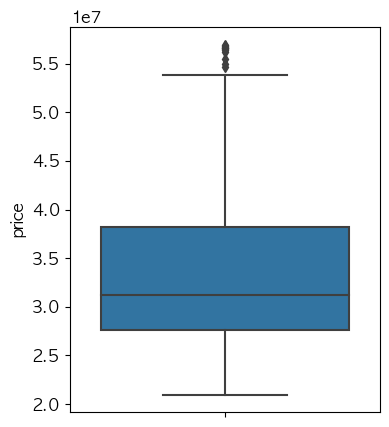

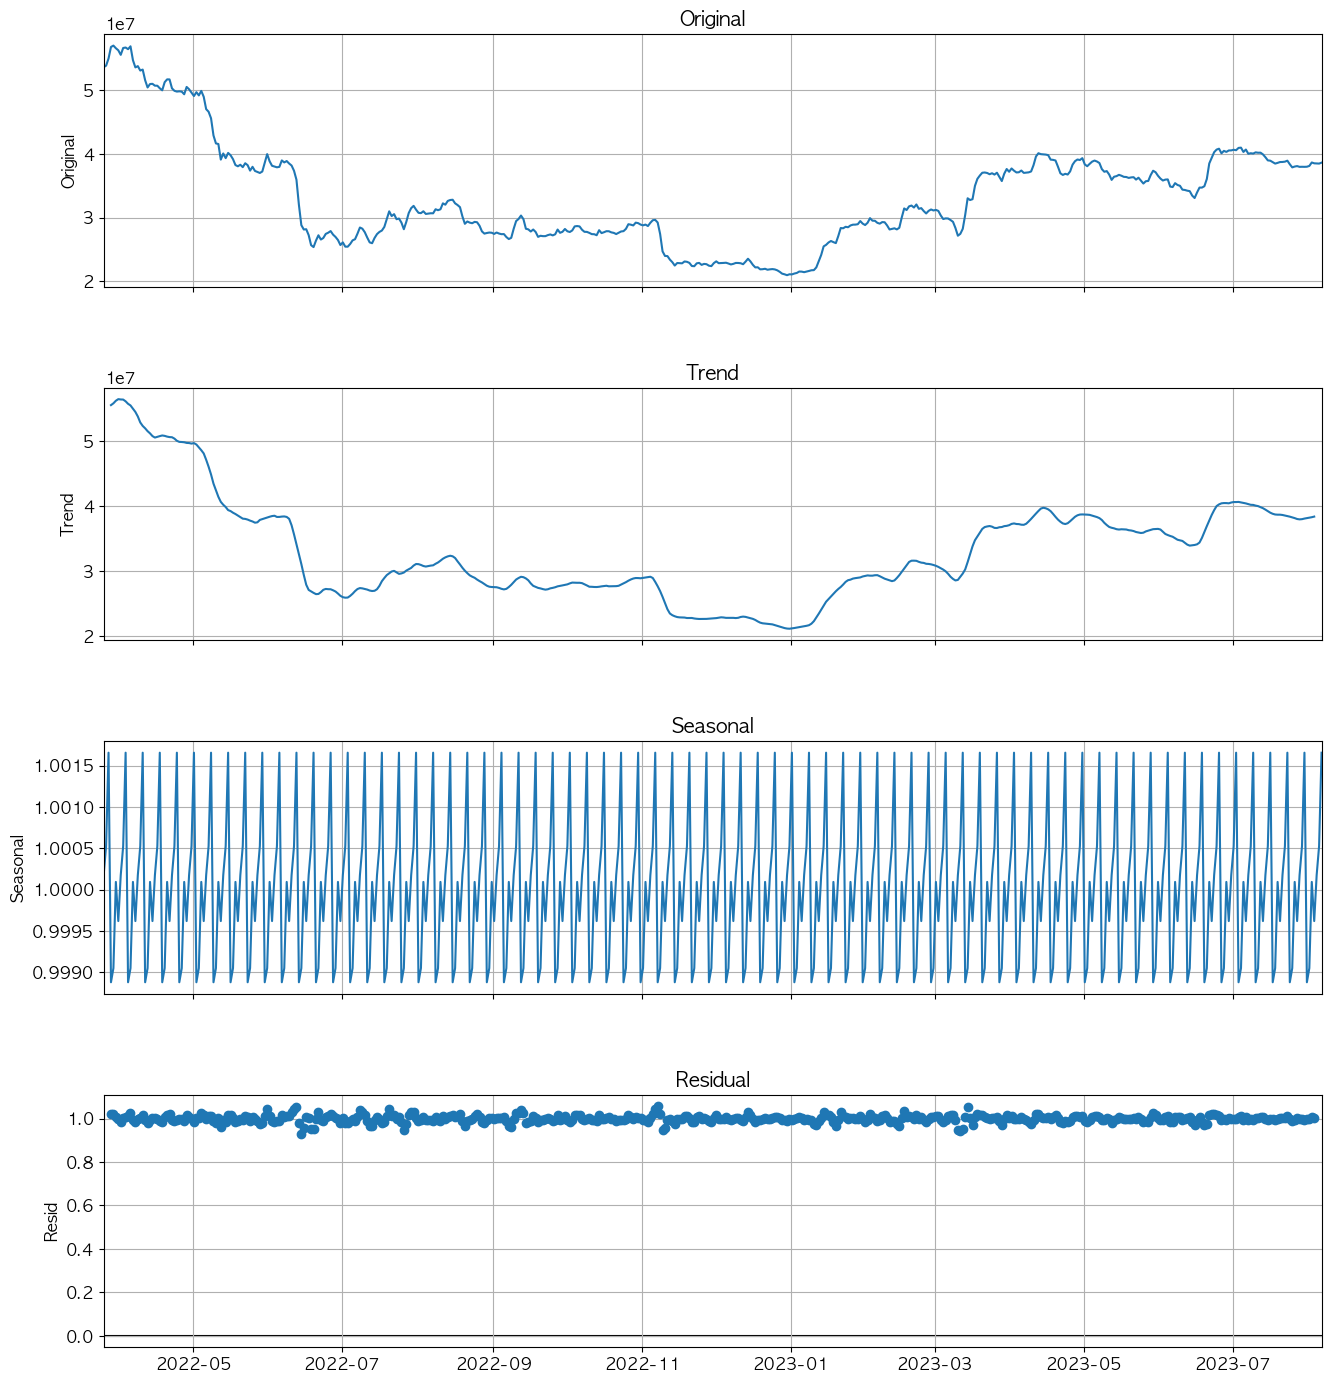

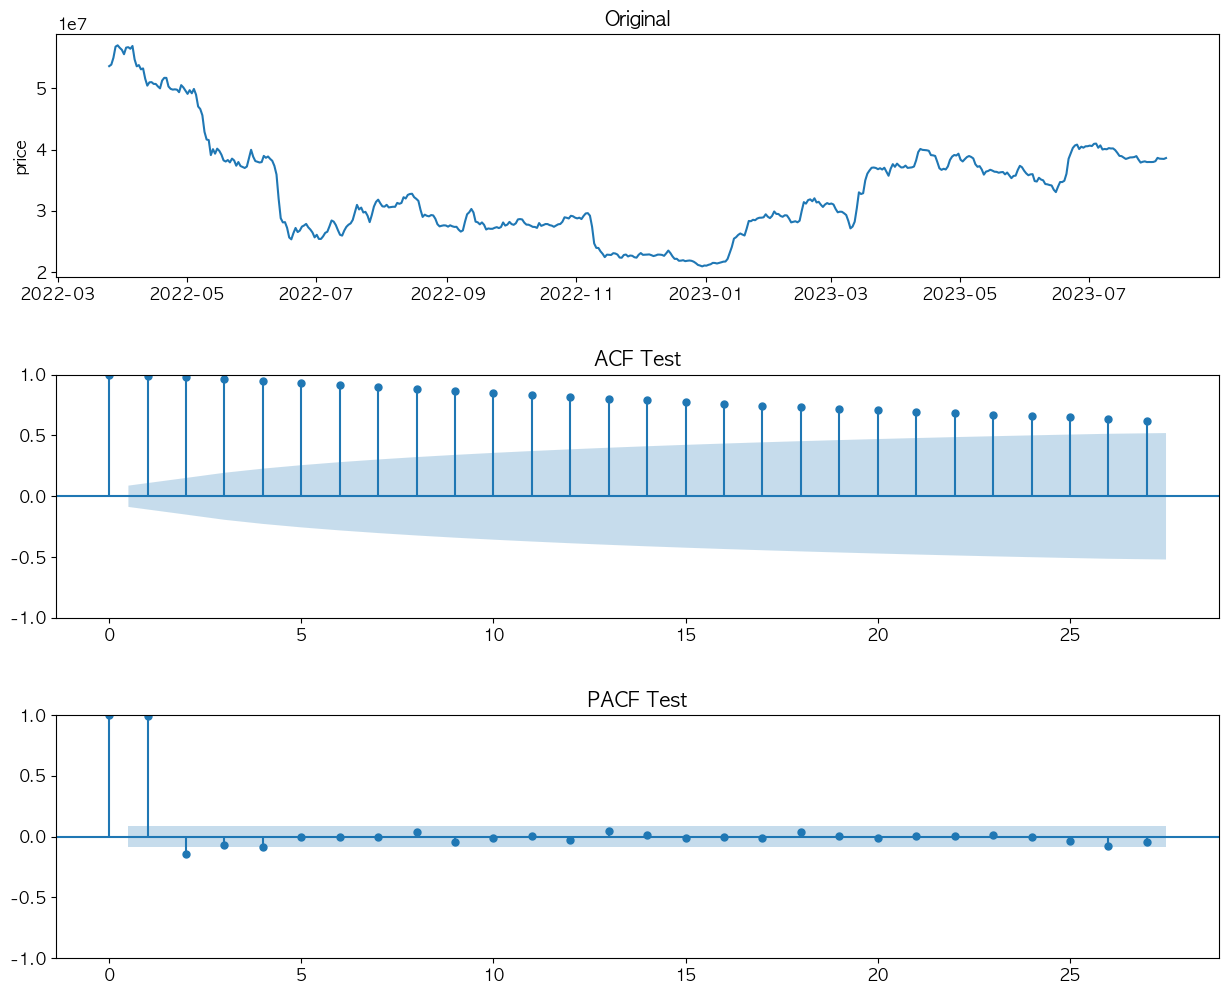

=========== 원본 데이터 ===========
+------------------------------------+-----------+
| ADF Test                           |           |
|------------------------------------+-----------|
| 검정통계량(ADF Statistic)          |  -3.07508 |
| 유의수준(p-value)                  | 0.0284529 |
| 최적차수(num of lags)              |         3 |
| 관측치 개수(num of observations)   |       496 |
| 기각값(Critical Values) 1%         |   -3.4436 |
| 기각값(Critical Values) 5%         |  -2.86738 |
| 기각값(Critical Values) 10%        |  -2.56988 |
| 데이터 정상성 여부(0=Flase,1=True) |         1 |
+------------------------------------+-----------+


In [42]:
exp_time_data(df, 'price', 'm')

> ACF test의 결과가 더 완만해 보이므로 AR(1) 모델로 결정
>
> 유의수준이 0.05 미만이므로 차분을 할 필요 없어보임 --> d = 0

## 5. ARIMA(정석) 분석
### 1) 분석 모델 구축

In [43]:
model = ARIMA(df['price'], 
              order =(1, 0, 0),
              seasonal_order=(1, 1, 0, 7))
my_fit = model.fit()
print(my_fit.summary())

                                    SARIMAX Results                                    
Dep. Variable:                           price   No. Observations:                  500
Model:             ARIMA(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood               -8044.773
Date:                         Mon, 07 Aug 2023   AIC                          16095.545
Time:                                 12:34:58   BIC                          16108.147
Sample:                             03-25-2022   HQIC                         16100.493
                                  - 08-06-2023                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6069      0.002    359.813      0.000       0.604       0.610
ar.S.L7       -0.2590      0.002   -112.625      0.000     

### 2) 분석 모델에 대한 예측치
- `my_fit.fittedvalues`

In [44]:
fv = my_fit.fittedvalues
fv

2022-03-25 09:00:00    0.000000e+00
2022-03-26 09:00:00    3.207295e+07
2022-03-27 09:00:00    3.193289e+07
2022-03-28 09:00:00    3.212577e+07
2022-03-29 09:00:00    3.240832e+07
                           ...     
2023-08-02 09:00:00    3.819302e+07
2023-08-03 09:00:00    3.853114e+07
2023-08-04 09:00:00    3.831587e+07
2023-08-05 09:00:00    3.837447e+07
2023-08-06 09:00:00    3.838377e+07
Freq: D, Length: 500, dtype: float64

### 3) 향후 30일 간의 데이터 예측
- `my_fit.forecast(30)`

In [45]:
fc = my_fit.forecast(30)
fc

2023-08-07 09:00:00    3.831736e+07
2023-08-08 09:00:00    3.818717e+07
2023-08-09 09:00:00    3.856191e+07
2023-08-10 09:00:00    3.844897e+07
2023-08-11 09:00:00    3.837836e+07
2023-08-12 09:00:00    3.835619e+07
2023-08-13 09:00:00    3.845288e+07
2023-08-14 09:00:00    3.823535e+07
2023-08-15 09:00:00    3.816833e+07
2023-08-16 09:00:00    3.858397e+07
2023-08-17 09:00:00    3.846579e+07
2023-08-18 09:00:00    3.840634e+07
2023-08-19 09:00:00    3.838511e+07
2023-08-20 09:00:00    3.849394e+07
2023-08-21 09:00:00    3.825682e+07
2023-08-22 09:00:00    3.817334e+07
2023-08-23 09:00:00    3.857834e+07
2023-08-24 09:00:00    3.846148e+07
2023-08-25 09:00:00    3.839912e+07
2023-08-26 09:00:00    3.837764e+07
2023-08-27 09:00:00    3.848332e+07
2023-08-28 09:00:00    3.825126e+07
2023-08-29 09:00:00    3.817205e+07
2023-08-30 09:00:00    3.857980e+07
2023-08-31 09:00:00    3.846260e+07
2023-09-01 09:00:00    3.840099e+07
2023-09-02 09:00:00    3.837957e+07
2023-09-03 09:00:00    3.848

### 4) 시각화

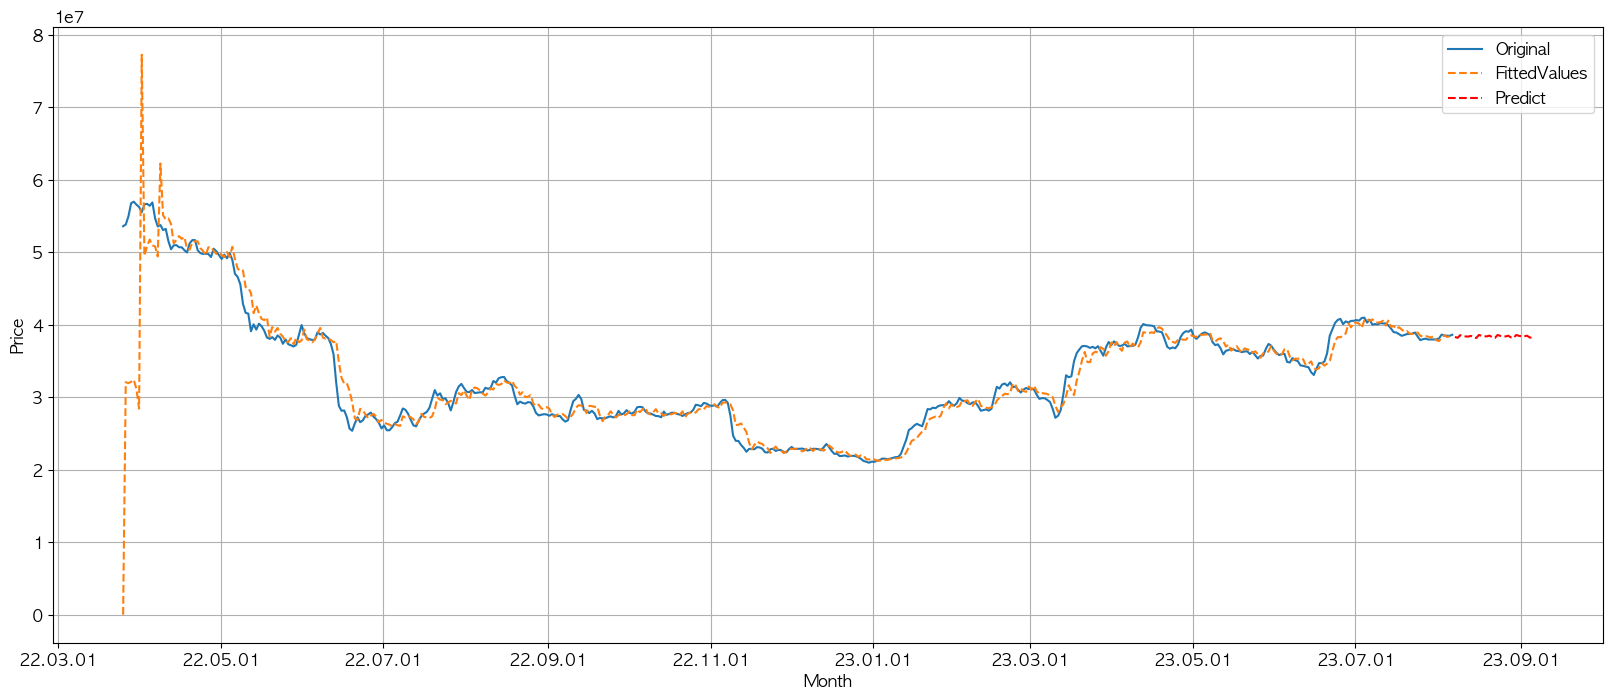

In [46]:
plt.figure(figsize=(20, 8))

# 원본
sb.lineplot(data=df, x=df.index, y='price', label='Original')
# 원본에 대한 학습결과
sb.lineplot(x=fv.index, y=fv.values, label='FittedValues',
            linestyle='--')
# 향후 30일 간의 예측값
sb.lineplot(x=fc.index, y=fc.values, label='Predict',
            linestyle='--', color='red')

plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m.%d')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()

## 6. AutoARIMA 사용
### 1) 분석 모델 구축

In [47]:
my_p = 1    # AR의 차수 (검증한 결과를 활용)
my_d = 1    # 차분 횟수 (검증한 결과를 활용)
my_q = 0    # MA의 차수 (검증한 결과를 활용)
my_s = 7    # 계절성 주기 (분석가가 판단)

model = auto_arima(
    y=df['price'],       # 모델링하려는 시계열 데이터 또는 배열
    start_p=0,           # p의 시작점
    max_p=my_p,          # p의 최대값
    d=my_d,              # 차분 횟수
    start_q=0,           # q의 시작점
    max_q=my_q,          # q의 최대값
    seasonal=True,       # 계절성 사용 여부
    m=my_s,              # 계절성 주기
    start_P=0,           # P의 시작점
    max_P=my_p,          # P의 최대값
    D=my_d,              # 계절성 차분 횟수
    start_Q=0,           # Q의 시작점
    max_Q=my_q,          # Q의 최대값
    trace=True           # 학습 과정 표시 여부
)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=14956.004, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=14929.788, Time=0.25 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=14957.743, Time=0.05 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=14949.560, Time=0.20 sec
 ARIMA(1,1,0)(1,1,0)[7] intercept   : AIC=14931.767, Time=0.17 sec

Best model:  ARIMA(1,1,0)(1,1,0)[7]          
Total fit time: 0.682 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  500
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 7)   Log Likelihood               -7461.894
Date:                           Mon, 07 Aug 2023   AIC                          14929.788
Time:                                   12:35:03   BIC                          14942.384
Sample:                               03-25-2022   HQIC                         14934.734
     

### 2) 잔차 분석

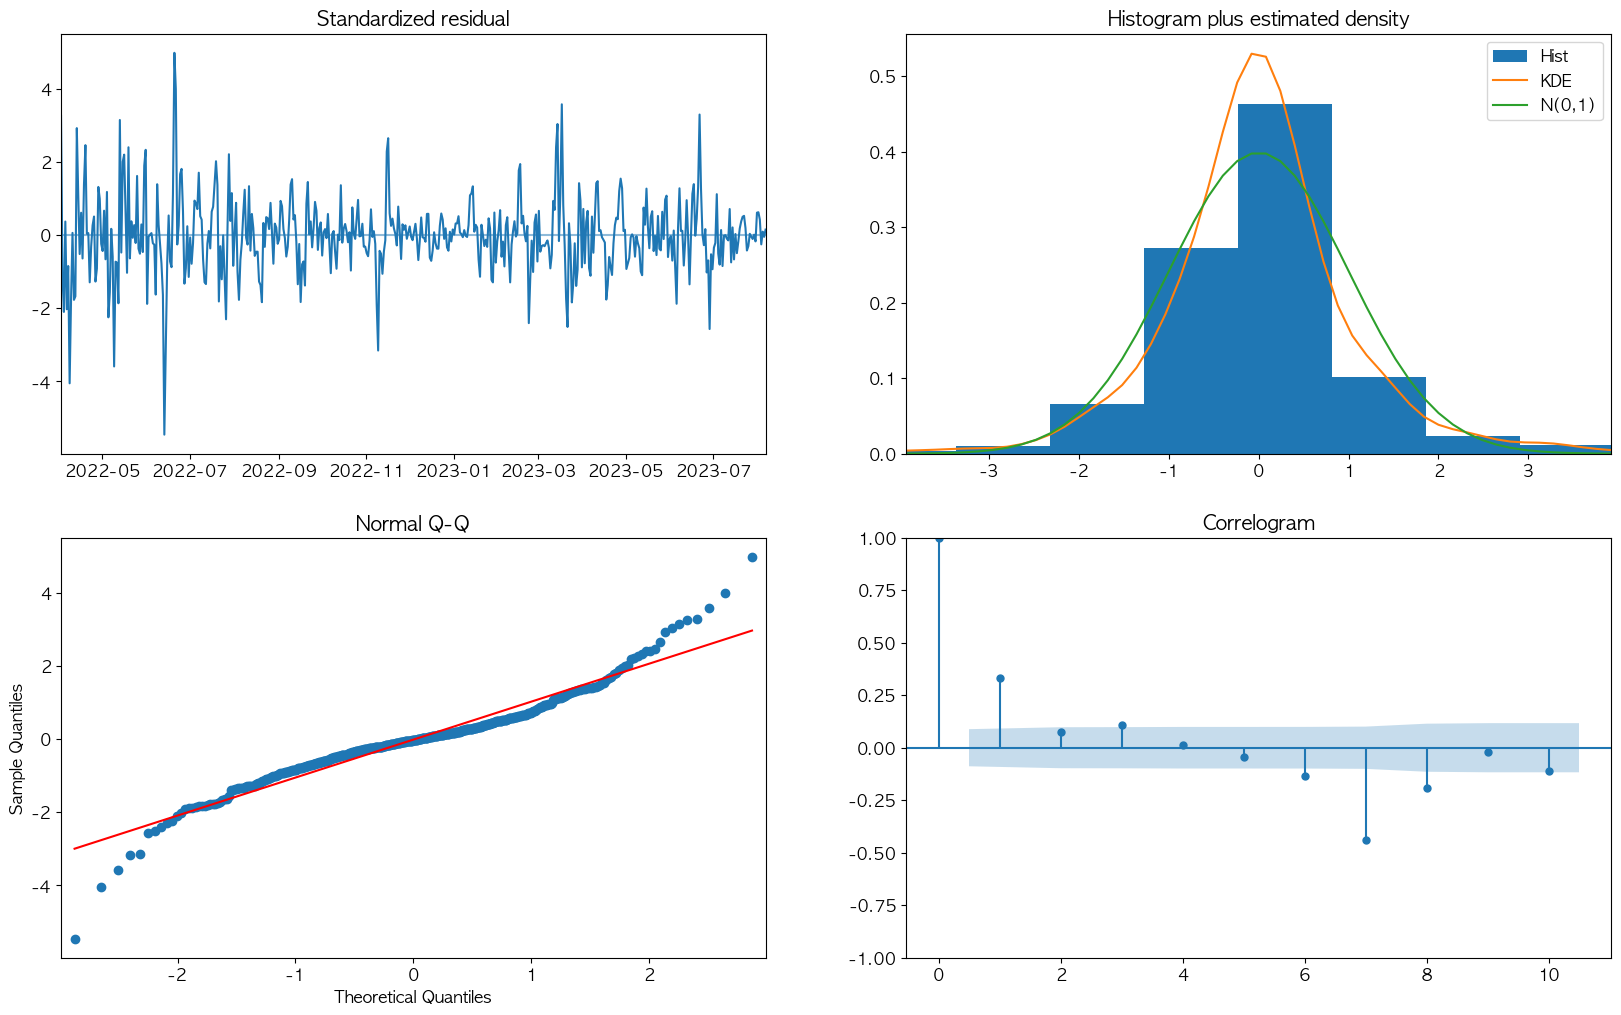

In [48]:
model.plot_diagnostics(figsize=(20, 12))
plt.show()
plt.close()

> 첫번째 그래프: 평균이 0 을 따라가는지, 
>
> 오른쪽 상단 그래프: 정규분포를 따라가는지, 
>
> 왼쪽 하단 그래프: 빨간 선에 근접한지,
>
> 등등을 고려한 후 너무 안 맞으면 앞서 차분을 수행하지 않아보임에도 불구하고 차분을 1회 추가적으로 수행해야 함

### 3) 학습 결과에 대한 예측값
- `학습한모델.fitted.values`

In [50]:
fv = model.fittedvalues()
fv.head()

2022-03-25 09:00:00    0.000000e+00
2022-03-26 09:00:00    5.582250e+07
2022-03-27 09:00:00    5.383184e+07
2022-03-28 09:00:00    5.498430e+07
2022-03-29 09:00:00    5.682831e+07
Freq: D, dtype: float64

### 4) 향후 30일 간의 시세 예측
- `학습한모델.predict(n_periods=n)`

In [51]:
fc = model.predict(n_periods=30)
fc.head()

2023-08-07 09:00:00    3.858298e+07
2023-08-08 09:00:00    3.865642e+07
2023-08-09 09:00:00    3.916127e+07
2023-08-10 09:00:00    3.904907e+07
2023-08-11 09:00:00    3.901622e+07
Freq: D, dtype: float64

### 5) 시각화

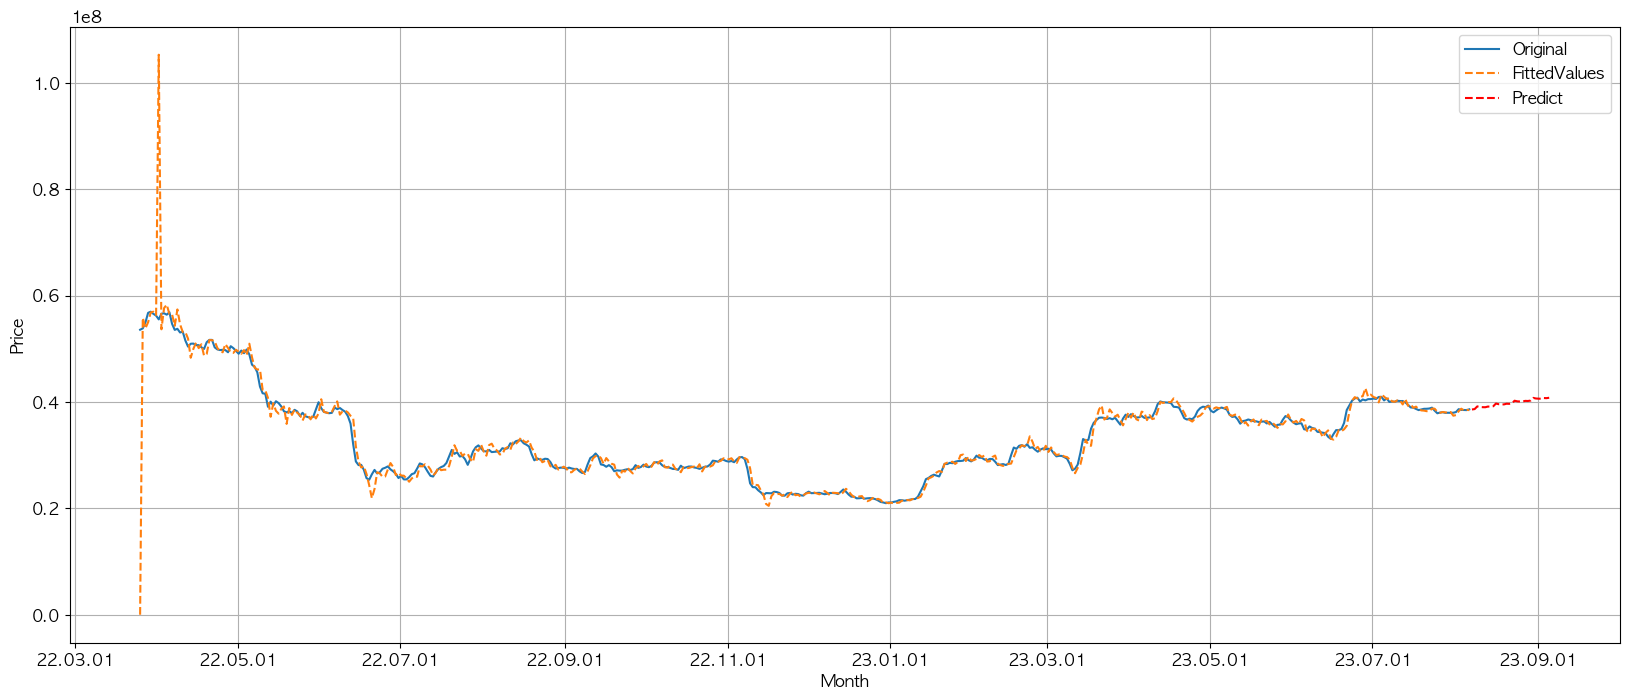

In [52]:
plt.figure(figsize=(20,8))

# 원본 데이터
sb.lineplot(data=df, x=df.index, y='price', label='Original')

# 원본에 대한 학습결과
sb.lineplot(x=fv.index, y=fv.values, label='FittedValues', 
            linestyle='--')

# 뒤 30% + 10단계에 대한 예측 데이터
sb.lineplot(x=fc.index, y=fc.values, label='Predict', 
            linestyle='--', color='red')

plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m.%d')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()

In [13]:
my_p = 1    # AR의 차수 (검증한 결과를 활용)
my_d = 1    # 차분 횟수 (검증한 결과를 활용)
my_q = 0    # MA의 차수 (검증한 결과를 활용)
my_s = 7    # 계절성 주기 (분석가가 판단)

model = auto_arima(
    y=df['price'],       # 모델링하려는 시계열 데이터 또는 배열
    start_p=0,           # p의 시작점
    max_p=my_p,          # p의 최대값
    d=my_d,              # 차분 횟수
    start_q=0,           # q의 시작점
    max_q=my_q,          # q의 최대값
    seasonal=True,       # 계절성 사용 여부
    m=my_s,              # 계절성 주기
    start_P=0,           # P의 시작점
    max_P=my_p,          # P의 최대값
    D=my_d,              # 계절성 차분 횟수
    start_Q=0,           # Q의 시작점
    max_Q=my_q,          # Q의 최대값
    trace=True           # 학습 과정 표시 여부
)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=14960.704, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=14941.175, Time=0.07 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=14946.919, Time=0.02 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=14979.490, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[7] intercept   : AIC=14943.163, Time=0.08 sec

Best model:  ARIMA(1,1,0)(1,1,0)[7]          
Total fit time: 0.230 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  500
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 7)   Log Likelihood               -7467.587
Date:                           Sat, 05 Aug 2023   AIC                          14941.175
Time:                                   22:48:33   BIC                          14953.770
Sample:                               03-23-2022   HQIC                         14946.120
     

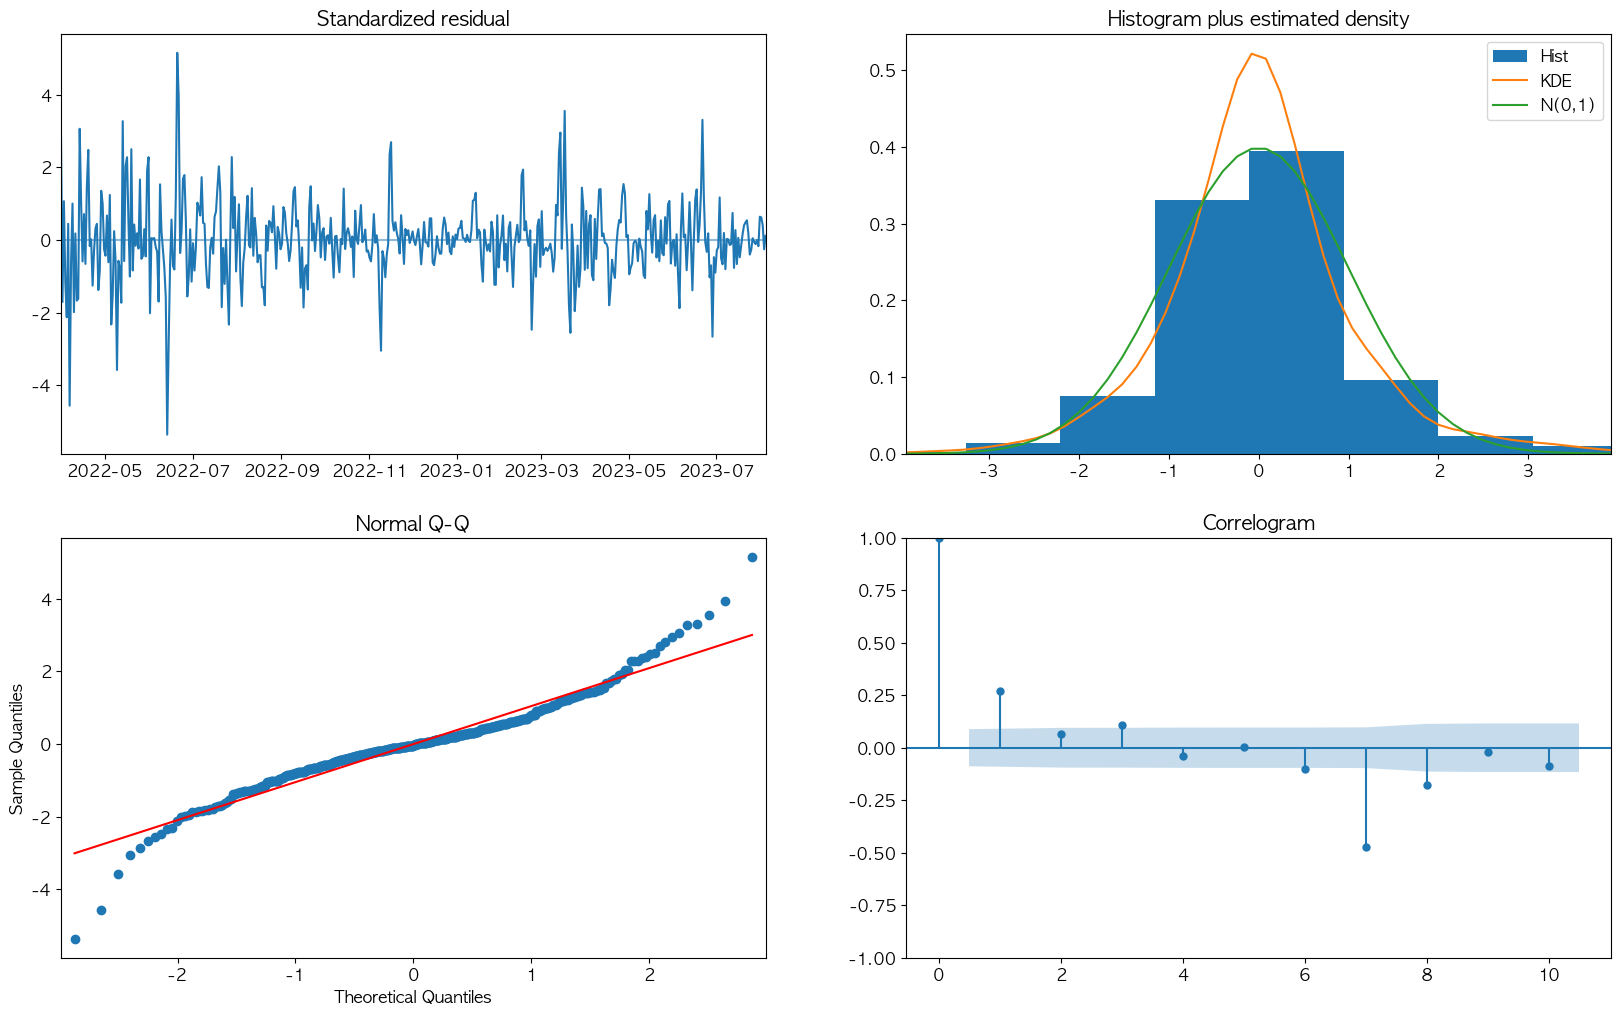

In [14]:
model.plot_diagnostics(figsize=(20, 12))
plt.show()

In [15]:
fv = model.fittedvalues()
fv.head()

2022-03-23 09:00:00    0.000000e+00
2022-03-24 09:00:00    5.557963e+07
2022-03-25 09:00:00    5.267849e+07
2022-03-26 09:00:00    5.364799e+07
2022-03-27 09:00:00    5.383914e+07
Freq: D, dtype: float64

In [16]:
fc = model.predict(n_periods=30)
fc.head()

2023-08-05 09:00:00    3.850413e+07
2023-08-06 09:00:00    3.850249e+07
2023-08-07 09:00:00    3.849269e+07
2023-08-08 09:00:00    3.859032e+07
2023-08-09 09:00:00    3.911150e+07
Freq: D, dtype: float64

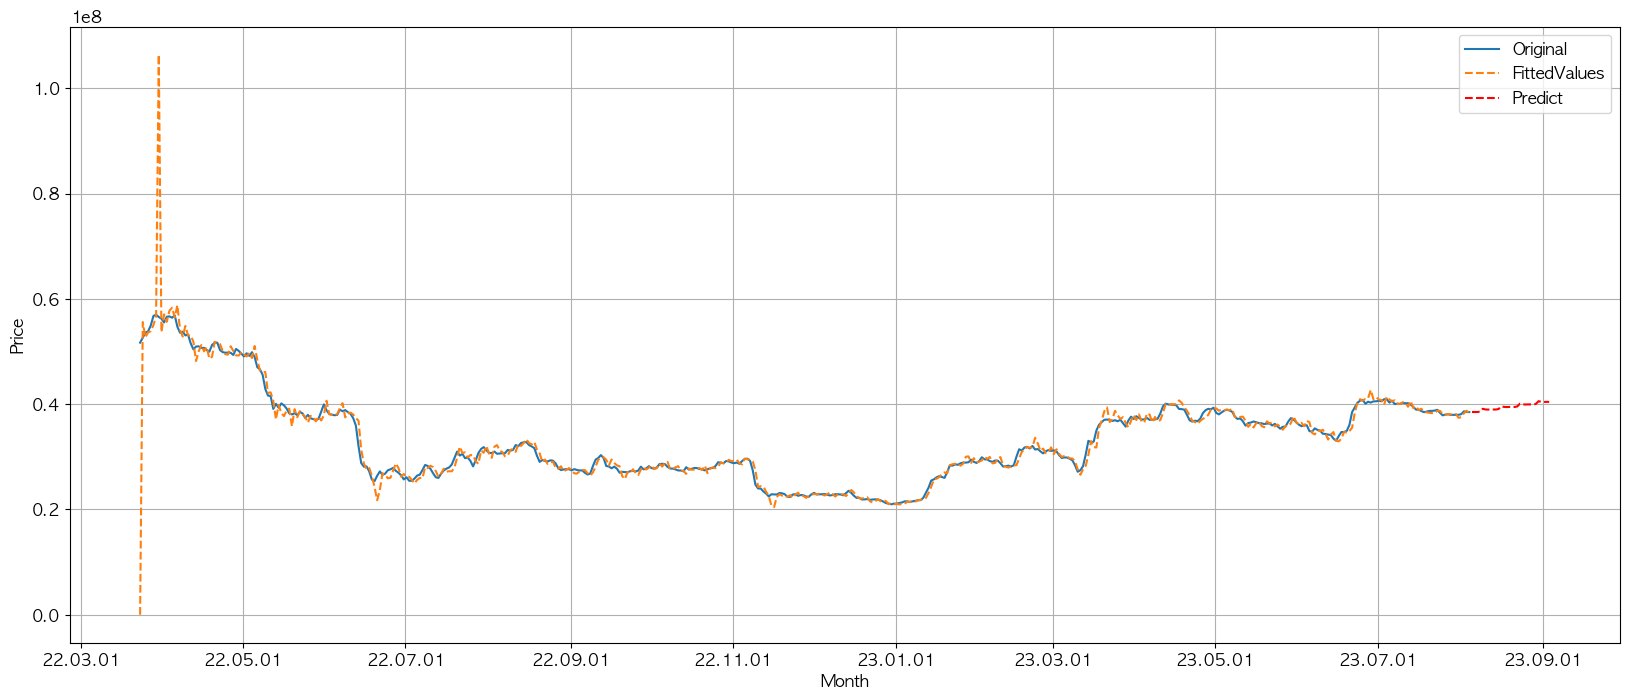

In [17]:
plt.figure(figsize=(20,8))

# 원본 데이터
sb.lineplot(data=df, x=df.index, y='price', label='Original')

# 원본에 대한 학습결과
sb.lineplot(x=fv.index, y=fv.values, label='FittedValues', linestyle='--')

# 예측 데이터
sb.lineplot(x=fc.index, y=fc.values, label='Predict', linestyle='--', color='red')

plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()

# 그래프의 x축이 날짜로 구성되어 있을 경우 형식 지정
monthyearFmt = mdates.DateFormatter('%y.%m.%d')
plt.gca().xaxis.set_major_formatter(monthyearFmt)

plt.grid()
plt.show()
plt.close()